📄 Using log file: logs\run_20251223_155537.csv


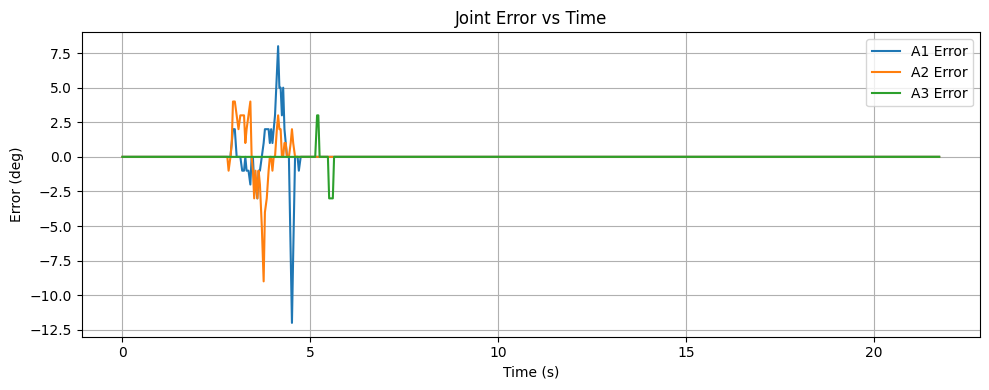

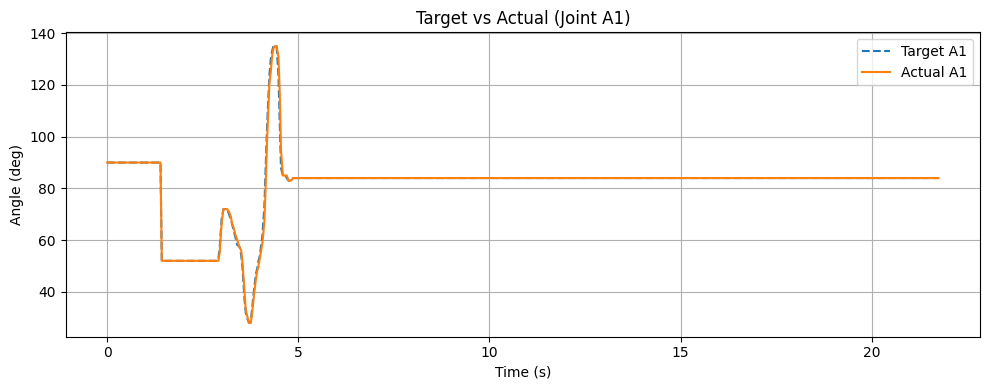

⚠️ Vision 数据太少，跳过图 3
⚠️ B0/B1 数据不足，跳过图 4
✅ Analysis completed.


In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. 找到最新的 CSV
# =========================
LOG_DIR = "logs"

csv_files = glob.glob(os.path.join(LOG_DIR, "*.csv"))
if not csv_files:
    raise FileNotFoundError("❌ logs 文件夹里没有 CSV 文件")

latest_csv = max(csv_files, key=os.path.getmtime)
print(f"📄 Using log file: {latest_csv}")

df = pd.read_csv(latest_csv)

# 时间归一化（从 0 开始）
df["t"] = df["t"] - df["t"].iloc[0]

# =========================
# 2. 图 1：Joint Error vs Time
# =========================
plt.figure(figsize=(10,4))
plt.plot(df["t"], df["err_a1"], label="A1 Error")
plt.plot(df["t"], df["err_a2"], label="A2 Error")
plt.plot(df["t"], df["err_a3"], label="A3 Error")
plt.xlabel("Time (s)")
plt.ylabel("Error (deg)")
plt.title("Joint Error vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 3. 图 2：Target vs Actual（A1）
# =========================
plt.figure(figsize=(10,4))
plt.plot(df["t"], df["target_a1"], "--", label="Target A1")
plt.plot(df["t"], df["actual_a1"], label="Actual A1")
plt.xlabel("Time (s)")
plt.ylabel("Angle (deg)")
plt.title("Target vs Actual (Joint A1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 4. 图 3：Vision Motion → Joint Command
# =========================
vision_df = df.dropna(subset=["dx", "dy"])

if len(vision_df) > 10:
    plt.figure(figsize=(6,5))
    plt.scatter(
        vision_df["dx"],
        vision_df["target_a1"] - 90,
        s=6,
        alpha=0.6
    )
    plt.xlabel("dx (pixel)")
    plt.ylabel("ΔA1 from 90° (deg)")
    plt.title("Vision Motion → Joint Command Mapping")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Vision 数据太少，跳过图 3")

# =========================
# 5. 图 4：B0 vs B1 稳定性对比
# =========================
if "strategy" in df.columns:
    b0 = df[df["strategy"] == "B0_RAW"]
    b1 = df[df["strategy"] == "B1_FILTERED"]

    if len(b0) > 10 and len(b1) > 10:
        plt.figure(figsize=(6,5))
        plt.boxplot(
            [b0["err_a1"].abs(), b1["err_a1"].abs()],
            labels=["B0_RAW", "B1_FILTERED"]
        )
        plt.ylabel("|Error A1| (deg)")
        plt.title("Baseline Comparison (Stability)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ B0/B1 数据不足，跳过图 4")
else:
    print("⚠️ 没有 strategy 列，跳过图 4")

print("✅ Analysis completed.")
